# Auditory Demonstrations: The Decibel Scale 

Based on:   
**Demo 4** in [**Auditory Demonstrations**](https://research.tue.nl/en/publications/auditory-demonstrations), *A.J.M. Houtsma, Th.D. Rossing, W.M. Wagemakers*, Technische Universiteit Eindhoven, Institute for Perception Research, 1987.    
Booklet with [detailed documentation](https://pure.tue.nl/ws/portalfiles/portal/79033010/402660.pdf)


In [3]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
try:
  import soundfile as sf
except:
  ! pip -q install soundfile
  import soundfile as sf
    
from pyspch import spectrogram as specg
from pyspch import audio
from pyspch import display as spch_disp

### The Demo

In the first part of this demonstration, we hear broadband noise reduced in steps of
6, 3, and 1 dB in order to obtain a feeling for the decibel scale

In [4]:
root = 'http://homes.esat.kuleuven.be/~compi/demos/'
fname = 'AuditoryDemonstrations/TrackNo08.wav'
resource = root+fname
#resource = 'train.wav'
# we load the CD data converted to 16kHz mono
wavdata, sample_rate = audio.load(resource,sample_rate=16000,mono=True)

In [5]:
# set pointers to instructions and demo data
n_shift = int(sample_rate/100)
instructions = wavdata[0:1200*n_shift]
demo = wavdata[1200*n_shift:]
#audio.play(instructions,samplerate,wait=True)
#audio.play(demo,samplerate)
#wavdata.ndim,wavdata.shape,demo.shape,samplerate

In [6]:
# Listen to the Instructions
Audio(data=instructions,rate=sample_rate,autoplay=False)

In [7]:
# Play Demo
Audio(data=demo,rate=sample_rate,autoplay=False)

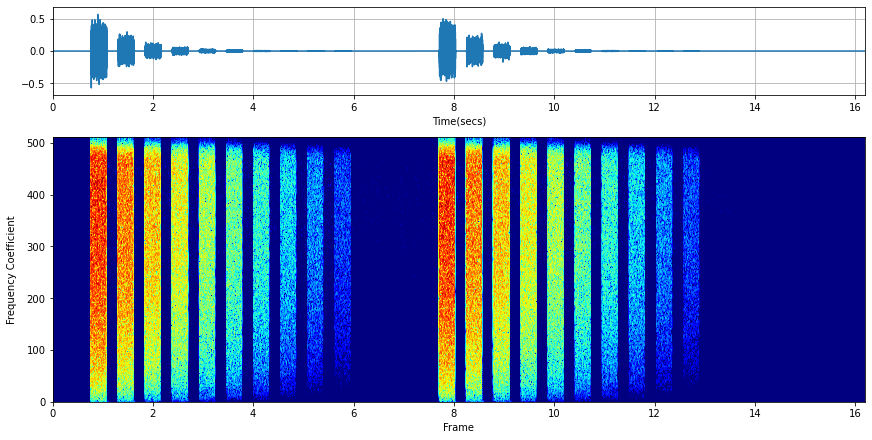

In [8]:
# Look at a Spectrogram of the Demo
spg = specg.spectrogram(demo,sample_rate=sample_rate,n_fft=1024)
fig= spch_disp.plot_spg(spg=[spg], wav=demo, sample_rate=sample_rate, f_shift=0.01)
ax = fig.axes
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Frequency Coefficient')
display(fig)

(-60.0, 0.0)

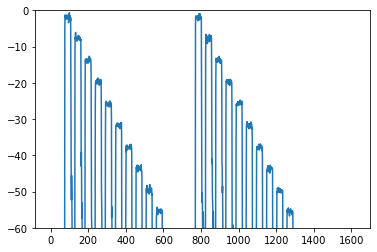

In [9]:
# intensity function in dB
# we measure intensity as  10. * log10(SUM(x^2)/N) + 14
# - the +15 offset is arbitrary
# - the EPS of 1.e-10 yields a range of around 60dB
# 
EPS = 1.e-10
OFFSET = 15.0
def intensity(y,n_shift):
    nfr = int(len(y)/n_shift)
    energy = np.zeros((nfr,))
    for ifr in range(0,nfr):
        energy[ifr] = np.sum(np.square(y[ifr*n_shift:(ifr*n_shift+n_shift)]))/float(n_shift)
    return(10*np.log10(energy+EPS) + OFFSET)

en = intensity(demo,n_shift)
plt.plot(en)
plt.ylim([-60,0])
        

### The Decibel Scale explained

In the final plot you see
- (1) waveform amplitudes (normalized range [-1,1])
- (2) color scaled spectrogram
    + energy more or less equally distributed over all frequencies
- (3) Energy or Intensity plotted on a dB scale (logarithmic)

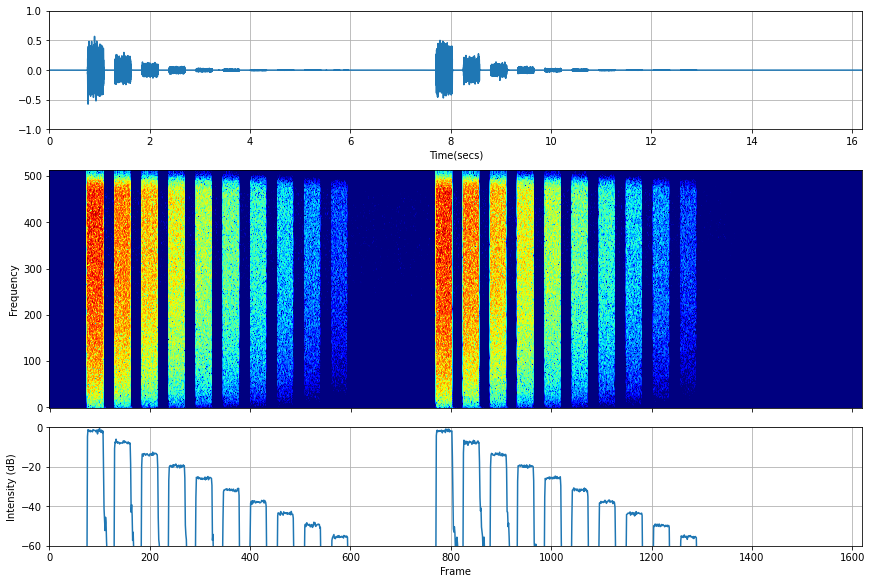

In [11]:
fig1 = spch_disp.make_subplots(figsize=(12,8),row_heights=[1.,2.,1.])
ax1 = fig1.axes
spch_disp.add_line_plot(ax1[0],demo,dx=1./sample_rate,yrange=[-1.,1.],xlabel='Time(secs)')
spch_disp.add_img_plot(ax1[1],spg,xticks=False,ylabel='Frequency')
spch_disp.add_line_plot(ax1[2],en,ylabel='Intensity (dB)',yrange=[-60,0],xlabel='Frame')